## 참고 자료

[Welcome to the Dask Tutorial](https://tutorial.dask.org/00_overview.html)

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1
def dec(x):
    sleep(1)
    return x - 1
def add(x, y):
    sleep(1)
    return x + y

In [4]:
from dask import compute, delayed
from dask.distributed import Client, progress
client = Client(n_workers=1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46333 instead
  warnings.warn(


In [5]:

l = []
for i in range(10):
    a = delayed(inc)(i)
    b = delayed(dec)(i)
    c = delayed(add)(a, b)
    l.append(c)

l

[Delayed('add-3fb3a652-cf13-46cd-bc3f-8ce628d25047'),
 Delayed('add-d01e70e1-a81d-4121-9186-0318489b11ef'),
 Delayed('add-d864b7f7-0db3-4a4e-a458-4b69c4ea0668'),
 Delayed('add-5d457492-cd12-40ff-9842-4faea866ea9e'),
 Delayed('add-b2ee3395-2d09-40ee-bdab-87cb1fbd3c45'),
 Delayed('add-6fb2b699-267f-41f2-bba2-a4563aa5e8b3'),
 Delayed('add-6fdb02a8-9cd3-4444-aa8a-8fa26b21d206'),
 Delayed('add-f8fc3381-53b0-496f-976a-4b70f81bb49c'),
 Delayed('add-7da07de9-448d-4d86-8d2e-5cb7868ce415'),
 Delayed('add-de259ddd-1ae7-4a2d-a434-f57bf858dab7')]

In [6]:

l = compute(*l)
l

(0, 2, 4, 6, 8, 10, 12, 14, 16, 18)

# DataFrame
- Dask DataFrame - parallelized pandas
    - https://tutorial.dask.org/01_dataframe.html
- Converting a Dask DataFrame to a pandas DataFrame
    - https://coiled.io/blog/converting-a-dask-dataframe-to-a-pandas-dataframe/

In [7]:
from dask.distributed import Client

client = Client(n_workers=2)
client

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43073 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:43073/status,
Dashboard: http://127.0.0.1:43073/status,Workers: 2
Total threads: 32,Total memory: 239.87 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35835,Workers: 2
Dashboard: http://127.0.0.1:43073/status,Total threads: 32
Started: Just now,Total memory: 239.87 GiB
Comm: tcp://127.0.0.1:42573,Total threads: 16
Dashboard: http://127.0.0.1:43395/status,Memory: 119.94 GiB
Nanny: tcp://127.0.0.1:39959,


In [8]:
import os
import dask

In [9]:
import dask.dataframe as dd
import pandas as pd
df = pd.DataFrame(
    {"nums": [1, 2, 3, 4, 5, 6], "letters": ["a", "b", "c", "d", "e", "f"]}
)
ddf = dd.from_pandas(df, npartitions=2)
ddf

,nums,letters
npartitions=2,,
0,int64,object
3,...,...
5,...,...


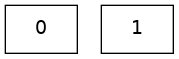

In [10]:
ddf.visualize()

In [11]:
len(ddf)

6

In [12]:
ddf.compute()

,nums,letters
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f


In [13]:
ddf["letters"].compute()

0    a
1    b
2    c
3    d
4    e
5    f
Name: letters, dtype: object

In [14]:
def df_print(x):
    # print("x : " , x)
    return x + x
    
    
ddf["letters"] = ddf["letters"].apply(df_print, meta=('letters', 'object')).compute()      
ddf["letters"].compute()

0    aa
1    bb
2    cc
3    dd
4    ee
5    ff
Name: letters, dtype: object

In [15]:
pandas_df = ddf.compute()
pandas_df

,nums,letters
0,1,aa
1,2,bb
2,3,cc
3,4,dd
4,5,ee
5,6,ff


In [16]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
